<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>



<h1><font color="#113D68" size=6>How to read TINTO images</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Luis Orozco-Barbosa</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
    * [1.2. Citation](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Read images](#section31)
    * [3.2. Data Curation](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Resize images](#section41)
    * [4.2. Iteradores](#section42)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
    * [5.3. Results](#section53)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTO in [GitHub](https://github.com/oeg-upm/TINTO)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTO offers the opportunity to convert tidy data into images through the representation of characteristic pixels by implementing two dimensional reduction algorithms: PCA and _t_-SNE. Our proposal also includes a blurring technique, which adds more ordered information to the image and can improve the classification task in CNNs.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data must be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTO does not accept data in string or any other non-numeric format.
- Two dimensionality reduction algorithms are used in image creation, **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)** and **[*t*-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)** from the Scikit-learn Python library.
- The synthetic images to be created will be in black and white, i.e. in 1 channel.
- The synthetic image **dimensions** can be set as a parameter when creating them.
- The synthetic images can be created using **characteristic pixels** or **blurring** painting technique (expressing an overlap of pixels as the **maximum** or **average**).
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate, Concatenate, AveragePooling2D


from torchmetrics import MeanAbsolutePercentageError
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning.loggers  import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination
import TINTOlib.utils

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_2864/10279189.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [5]:
#Select the model and the parameters
problem_type = "supervised"
pixels = 20
image_model = TINTO(problem=problem_type,verbose=True,blur=True,pixels=pixels,)

#Define the dataset path and the folder where the images will be saved
dataset_path = "/Users/manwest/Git/TINTOlib/Pruebas/Datasets/winequality-red.csv"
images_folder = "hybridclassification"




Normalize dataset

In [6]:
df = pd.read_csv(dataset_path, sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [7]:
# Select all the attributes to normalize
columns_to_normalize = df.columns[:-1]


# Normalize between 0 and 1
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Combine the attributes and the label
df_normalized = pd.concat([df_normalized, df[df.columns[-1]]], axis=1)

df_normalized.head(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.0,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.0,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5


In [ ]:
#Generate thet images
image_model.generateImages(df, images_folder)

In [9]:
img_paths = os.path.join(images_folder,problem_type+".csv")
print(img_paths)

hybridclassification/supervised.csv


<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Data Analysis</font>

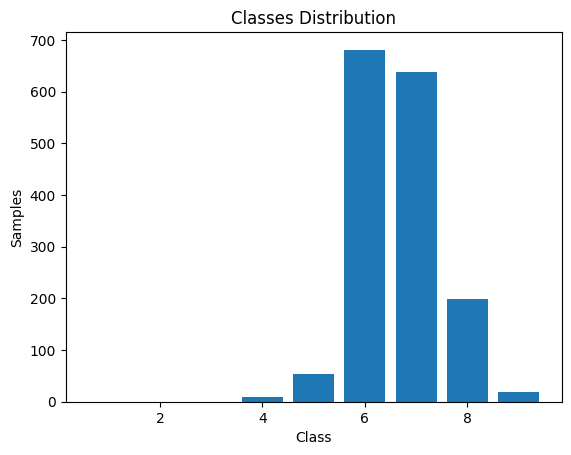

In [10]:
target_values = df.iloc[:,-1]
class_counts = np.bincount(target_values)
class_labels = np.arange(1, len(class_counts) + 1)

# Crea el gráfico de barras
plt.bar(class_labels, class_counts)

# Personaliza el gráfico
plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes Distribution')

# Muestra el gráfico
plt.show()

<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Read images</font>

In [11]:
imgs = pd.read_csv(img_paths)

#imgs["images"]= images_folder + "\\" + imgs["images"]
imgs["images"]= images_folder + "/" + imgs["images"]

combined_dataset = pd.concat([imgs,df_normalized[columns_to_normalize]],axis=1)
combined_dataset

df_x = combined_dataset.drop("class",axis=1)
df_y = combined_dataset["class"].replace(-1, 0)

df_x.head(2)

,images,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,hybridclassification/5.0/000000.png,0.247788,0.397260,0.0,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,hybridclassification/5.0/000001.png,0.283186,0.520548,0.0,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

In [13]:
import cv2
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = 123,stratify=df_y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123, stratify=y_val)

X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])

"""X_train_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_train["images"]])
X_val_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_val["images"]])
X_test_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_test["images"]])"""

n_class = df['quality'].value_counts().count()
attributes = len(X_train_num.columns)
print("Image shape",X_train_img[0].shape)
print("Attributes",attributes)
print("Classes",n_class)


Image shape (20, 20, 3)
Attributes 11
Classes 6


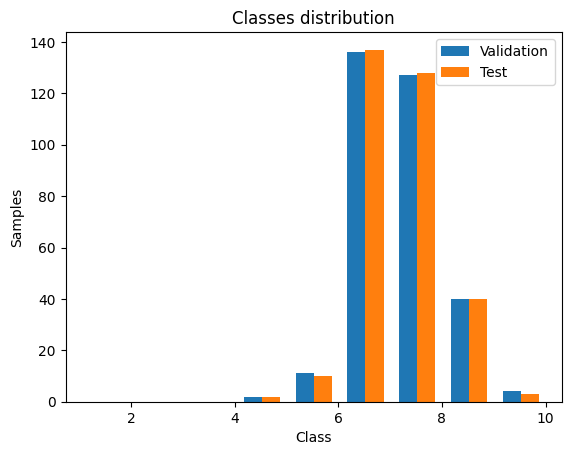

In [14]:
#SPLITS CLASS DISTRIBUTION

train_class_counts = np.bincount(y_train)
val_class_counts = np.bincount(y_val)
test_class_counts = np.bincount(y_test)

width = 0.35 
#plt.bar(class_labels, train_class_counts, width, label='Train')
plt.bar(class_labels + width, val_class_counts, width, label='Validation')
plt.bar(class_labels + width*2, test_class_counts, width, label='Test')

plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes distribution')
#plt.xticks(class_labels + width / 2, class_labels)
plt.legend()

# Mostrar el gráfico
plt.show()


In [17]:
#ONE HOT ENCODING FOR MULTICLASS PROBLEMS
from tensorflow.keras.utils import to_categorical

# IMPORTANTE ----> y-1 because target is between [1,28] and not [0,27]
y_train_oh =  to_categorical(y_train-3,n_class)
y_val_oh = to_categorical(y_val-3,n_class)
y_test_oh = to_categorical(y_test-3,n_class)

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

In [18]:
dropout = 0.1

In [19]:
####################  ONE BRANCH #####################

#filters_ffnn = [64,32,16]

#ff_model = Sequential()
#ff_model.add(Input(shape=(attributes,)))

#for layer in filters_ffnn:
#    ff_model.add(Dense(layer, activation="relu"))
#    #ff_model.add(BatchNormalization())
#    ff_model.add(Dropout(dropout))

####################  TWO BRANCH #####################
filters_ffnn = [512,256,128,64,32] #CAMBIO

ff_inputs = Input(shape = (attributes,))

# * INCIO RAMA 1
#mlp_1 = Dense(1024, activation='relu')(ff_inputs)
#mlp_1 = BatchNormalization()(mlp_1)
#mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(512, activation='relu')(ff_inputs)
#mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(256, activation='relu')(mlp_1)
#mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(128, activation='relu')(mlp_1)
#mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(64, activation='relu')(mlp_1)
#mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(32, activation='relu')(mlp_1)
#mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

#mlp_1 = Dense(16, activation='relu')(mlp_1)
#mlp_1 = BatchNormalization()(mlp_1)
#mlp_1 = Dropout(dropout)(mlp_1)

# * INICIO RAMA 2
#mlp_2 = Dense(1024, activation='relu')(ff_inputs)
#mlp_2 = BatchNormalization()(mlp_2)
#mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(512, activation='relu')(ff_inputs)
#mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(256, activation='relu')(mlp_2)
#mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(128, activation='relu')(mlp_2)
#mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(64, activation='relu')(mlp_2)
#mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

mlp_2 = Dense(32, activation='relu')(mlp_2)
#mlp_2 = BatchNormalization()(mlp_2)
mlp_2 = Dropout(dropout)(mlp_2)

#mlp_2 = Dense(16, activation='relu')(mlp_2)
#mlp_2 = BatchNormalization()(mlp_2)
#mlp_2 = Dropout(dropout)(mlp_2)

merged_tabular = Concatenate(axis=1)([mlp_1, mlp_2])

ff_model = Model(inputs = ff_inputs, outputs = merged_tabular)

2024-02-03 10:23:21.441669: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-02-03 10:23:21.441692: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-02-03 10:23:21.441710: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-02-03 10:23:21.441738: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-03 10:23:21.441755: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
####################  ONE BRANCH #####################
#filters_cnn =  [16,32, 64]

#cnn_model = Sequential()
#cnn_model.add(Input(shape=(size,size, 3)))

#for layer in filters_cnn:
#    cnn_model.add(Conv2D(layer, (3, 3), padding="same"))
#    cnn_model.add(Activation("relu"))
    #cnn_model.add(BatchNormalization())
#    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the volume, then FC => RELU => BN => DROPOUT
#cnn_model.add(Flatten())
#cnn_model.add(Dense(128))
#cnn_model.add(Activation("relu"))
#cnn_model.add(BatchNormalization())
#cnn_model.add(Dropout(dropout))

# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
#cnn_model.add(Dense(64))
#cnn_model.add(Activation("relu"))
#cnn_model.add(Dropout(dropout))

####################  ONE BRANCH #####################

input_shape = Input(shape=(pixels, pixels, 3))

#Inicio de rama 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
#tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
#tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
#tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
#tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)
#Fin de rama 1

#Inicio de rama 2
tower_2 = Conv2D(16, (5,5), activation='relu',padding="same")(input_shape)
#tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

tower_2 = Conv2D(32, (5,5), activation='relu',padding="same")(tower_2)
#tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

tower_2 = Conv2D(64, (5,5), activation='relu',padding="same")(tower_2)
#tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)

tower_2 = Conv2D(64, (5,5), activation='relu',padding="same")(tower_2)
#tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = AveragePooling2D(2,2)(tower_2)
tower_2 = Dropout(dropout)(tower_2)
#Fin de rama 2

#Concatenación de las 2 ramas
merged = Concatenate(axis=1)([tower_1, tower_2])

#Aplanamiento
merged = Flatten()(merged)

#Capas adicionales
out = Dense(512, activation='relu')(merged)
out = Dropout(dropout)(merged)
out = Dense(256, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(128, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(64, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(32, activation='sigmoid')(out)
out = Dropout(dropout)(out)

#Capa final de clasificación
#out = Dense(n_class, activation='softmax')(out)

cnn_model = Model(input_shape, out)

In [21]:
####################  Concatenación final #####################
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(128, activation="relu")(combinedInput)
#x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(64, activation="relu")(x)
#x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(32, activation="relu")(x)
#x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(n_class, activation="softmax")(x)

model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

In [22]:
METRICS = [
    #tf.keras.metrics.TruePositives(name = 'tp'),
    #tf.keras.metrics.FalsePositives(name = 'fp'),
    #tf.keras.metrics.TrueNegatives(name = 'tn'),
    #tf.keras.metrics.FalseNegatives(name = 'fn'), 
    tf.keras.metrics.CategoricalAccuracy(name ='accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall'),
    tf.keras.metrics.AUC(name = 'auc'),
]

In [23]:
#HYPERPARAMETERS
opt = tf.keras.optimizers.legacy.Adam()
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt,
    metrics = METRICS
)
epochs = 500

In [26]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=10, mode="max" ,restore_best_weights=True)

In [27]:
model_history=model.fit(
    x=[X_train_num, X_train_img], y=y_train_oh,
    validation_data=([X_val_num, X_val_img], y_val_oh),
    epochs=epochs , 
    batch_size=8,
    #steps_per_epoch = X_train_num.shape[0]//batch_size,
    #validation_steps = X_train_num.shape[0]//batch_size,
    #callbacks=[early_stopping]
)

Epoch 1/500
  1/120 [..............................] - ETA: 4s - loss: 54.0158 - accuracy: 0.6250 - precision: 0.6250 - recall: 0.6250 - auc: 0.7750

120/120 [==============================] - 5s 41ms/step - loss: 56.7416 - accuracy: 0.4651 - precision: 0.4651 - recall: 0.4651 - auc: 0.6868 - val_loss: 307.6024 - val_accuracy: 0.0125 - val_precision: 0.0125 - val_recall: 0.0125 - val_auc: 0.4075
Epoch 2/500
120/120 [==============================] - 5s 40ms/step - loss: 47.1682 - accuracy: 0.4818 - precision: 0.4818 - recall: 0.4818 - auc: 0.6965 - val_loss: 127.8962 - val_accuracy: 0.3969 - val_precision: 0.3969 - val_recall: 0.3969 - val_auc: 0.6425
Epoch 3/500
120/120 [==============================] - 5s 40ms/step - loss: 58.3331 - accuracy: 0.4703 - precision: 0.4703 - recall: 0.4703 - auc: 0.6913 - val_loss: 255.6894 - val_accuracy: 0.1469 - val_precision: 0.1469 - val_recall: 0.1469 - val_auc: 0.4889
Epoch 4/500
120/120 [==============================] - 5s 41ms/step - loss: 48.3704 - accuracy: 0.4901 - precision: 0.4901 - recall: 0.4901 - auc: 0.7013 - val_loss: 307.7616 - val_accuracy: 0.0156 - val_precision: 0.0156 - val_r

In [28]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

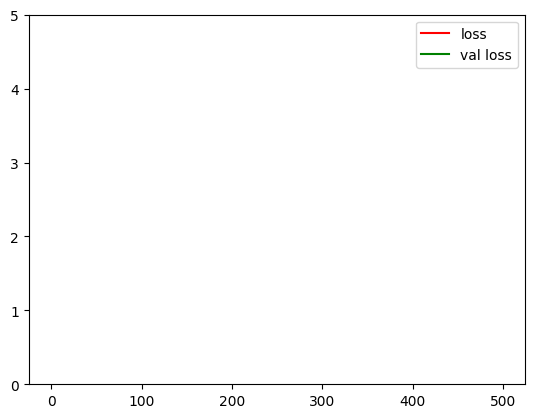

In [29]:
#print(model_history.history['loss'])
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.ylim(0,5)
plt.show()

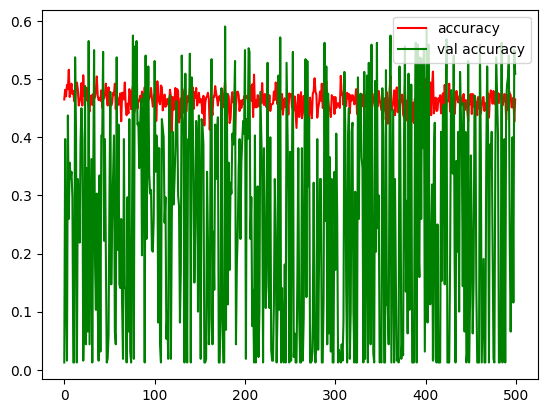

In [30]:
plt.plot(model_history.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [33]:
prediction = model.predict([X_test_num,X_test_img/255],)
real_values= y_test.values-3
predicted_classes = np.argmax(prediction, axis = 1)

result = [list(t) for t in zip(predicted_classes, real_values)]
#print(np.round(prediction))
print(result)

10/10 [==============================] - 0s 5ms/step
[[2, 0.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 3.0], [2, 2.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 3.0], [2, 2.0], [3, 4.0], [2, 3.0], [3, 3.0], [2, 3.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 3.0], [4, 3.0], [2, 3.0], [2, 3.0], [2, 3.0], [2, 1.0], [2, 2.0], [2, 4.0], [2, 2.0], [2, 2.0], [3, 4.0], [2, 2.0], [3, 3.0], [2, 2.0], [2, 2.0], [2, 3.0], [2, 2.0], [4, 3.0], [2, 2.0], [2, 2.0], [3, 3.0], [2, 3.0], [2, 1.0], [2, 2.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 3.0], [3, 3.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 2.0], [2, 3.0], [2, 3.0], [2, 2.0], [2, 2.0], [2, 2.0], [2, 3.0], [3, 4.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 2.0], [2, 2.0], [2, 2.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 2.0], [2, 2.0], [2, 3.0], [4, 4.0], [2, 3.0], [2, 2.0], [2, 2.0], [2, 2.0], [2, 3.0], [2, 3.0], [2, 4.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 3.0], [2, 1.0], [2, 4.0], [3, 4.0], [2, 3.0], [2, 2.0], [2, 3.0], [2, 3.

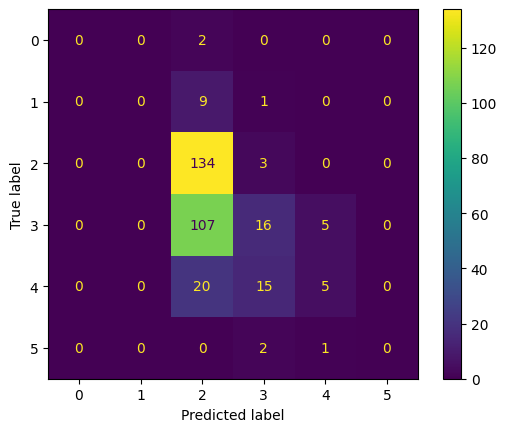

In [34]:
from sklearn.metrics import confusion_matrix
true_classes = real_values

cm = confusion_matrix(true_classes, predicted_classes)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()




In [35]:
report = sklearn.metrics.classification_report(true_classes, 
                                               predicted_classes)
print(report) 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00        10
         2.0       0.49      0.98      0.66       137
         3.0       0.43      0.12      0.19       128
         4.0       0.45      0.12      0.20        40
         5.0       0.00      0.00      0.00         3

    accuracy                           0.48       320
   macro avg       0.23      0.20      0.17       320
weighted avg       0.44      0.48      0.38       320



/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [131]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score, recall_score

test_accuracy = accuracy_score(true_classes, predicted_classes)
#test_auc = roc_auc_score(true_classes, predicted_classes)
#test_precision = precision_score(true_classes, predicted_classes)
#test_recall = recall_score(true_classes, predicted_classes)

print("Test accuracy:",test_accuracy)
#print("Test AUC:",test_auc)
#print("Test precision:",test_precision)
#print("Test recall:",test_recall)

Test accuracy: 0.22142857142857142


In [129]:
train_accuracy = model_history.history["accuracy"][-1]
train_auc = model_history.history["auc"][-1]
train_precision = model_history.history["precision"][-1]
train_recall = model_history.history["recall"][-1]
train_loss = model_history.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

Train accuracy: 0.9642219543457031
Train AUC: 0.8031144738197327
Train precision: 0.2857142984867096
Train recall: 0.0011904762359336019
Train loss: 2.751965284347534


In [130]:
validation_accuracy = model_history.history["val_accuracy"][-1]
validation_auc = model_history.history["val_auc"][-1]
validation_precision = model_history.history["val_precision"][-1]
validation_recall = model_history.history["val_recall"][-1]
validation_loss = model_history.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

Validation accuracy: 0.9642857313156128
Validation AUC: 0.8785466551780701
Validation precision: 0.0
Validation recall: 0.0
Validation loss: 2.4721860885620117


In [83]:
import csv

experiments_csv = "C:\\Users\\Borja\\EXP_TINTOLIB\\Classification\\Classification_Cancer.csv"
model_name = "TINTO1000"
preprocess = "TINTO"

FFNN = str(filters_ffnn)
CNN = str(filters_cnn)
BIAS = (1-train_accuracy-0.05)
VARIANCE = (1-train_accuracy)-(1-validation_accuracy)
metrics = [model_name,preprocess,epochs,FFNN,CNN,test_accuracy,test_auc,test_precision,test_recall,BIAS,VARIANCE,
           train_accuracy,train_auc,train_precision,train_recall,train_loss,
           validation_accuracy,validation_auc,validation_precision,validation_recall,validation_loss]
print(metrics)


['TINTO1000', 'TINTO', 1000, '[32, 16, 16]', '[32, 16, 16]', 0.8947368421052632, 0.8788077301015396, 0.8974358974358975, 0.813953488372093, 0.041176450252532956, 0.03854489326477051, 0.908823549747467, 0.9624514579772949, 0.875, 0.8677685856819153, 0.2325555980205536, 0.9473684430122375, 0.9680850505828857, 0.9767441749572754, 0.8936170339584351, 0.20427170395851135]


In [85]:
with open(experiments_csv, 'a', newline='') as archivo:
    escritor_csv = csv.writer(archivo)
    escritor_csv.writerow(metrics)